<a href="https://colab.research.google.com/github/ChiomaO15/Comparative-analysis/blob/main/Comparative_Analysis_of_Bacillus_coagulans%2CBacillus_amyloliquefaciens_and_Streptococcus_thermophilus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a comparative analysis to examine the metabolic pathways of *Bacillus coagulans* and *Bacillus amyloliquefaciens,* focusing on their ability to utilize key nutrients and survive under stress conditions like bile acid exposure and anaerobic environments. This analysis will assess their probiotic potential, particularly in relation to short-chain fatty acid (SCFA) production, oxygen tolerance, and bile salt resistance. The comparison will also extend to other probiotic strains, such as *Streptococcus thermophilus*, to highlight metabolic differences that may influence their survival and growth in the human gut

In [ ]:
pip install cobra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 42.8 MB/s eta 0:00:00


In [ ]:
import cobra
import pandas as pd

# Load the models
bc_model = cobra.io.read_sbml_model("/content/Bacilluscoagulansmodel.sbml")
ba_model = cobra.io.read_sbml_model("/content/Bamyloliquefaciensmodel.sbml")
st_model = cobra.io.read_sbml_model("/content/streptococcusthermophilus.sbml")


Streaming output truncated to the last 5000 lines.


In [ ]:
# Function to simulate growth under different conditions
def simulate_model(model, oxygen_uptake_rate=-20):
    # Set the biomass reaction to "bio1"
    model.objective = "bio1"

    # Set the oxygen exchange rate to simulate aerobic/anaerobic conditions
    if "EX_cpd00007_b" in model.reactions:  # Ensure the model has oxygen exchange
        model.reactions.get_by_id("EX_cpd00007_b").lower_bound = oxygen_uptake_rate

    # Perform FBA
    solution = model.optimize()

In [ ]:
def simulate_model(model, oxygen_uptake_rate=-20):
    try:
        # Ensure the biomass reaction is set to "bio1"
        if "bio1" in model.reactions:
            model.objective = "bio1"
        else:
            raise ValueError("Biomass reaction 'bio1' not found in the model.")

        # Set the oxygen exchange rate
        if "EX_cpd00007_b" in model.reactions:
            model.reactions.get_by_id("EX_cpd00007_b").lower_bound = oxygen_uptake_rate
        else:
            raise ValueError("Oxygen exchange reaction 'EX_cpd00007_b' not found in the model.")

        # Perform FBA
        solution = model.optimize()

        # Check if the solution is valid
        if solution.status != 'optimal':
            raise RuntimeError(f"Optimization failed for the model with status: {solution.status}")

        # Extract relevant data
        biomass = solution.objective_value
        flux_distribution = solution.fluxes
        return biomass, flux_distribution

    except Exception as e:
        print(f"Error in simulating the model: {e}")
        return None, None


In [ ]:
# Simulate models under aerobic conditions
print("Simulating aerobic conditions...")
bc_aerobic_biomass, bc_aerobic_flux = simulate_model(bc_model, oxygen_uptake_rate=-20)
ba_aerobic_biomass, ba_aerobic_flux = simulate_model(ba_model, oxygen_uptake_rate=-20)
st_aerobic_biomass, st_aerobic_flux = simulate_model(st_model, oxygen_uptake_rate=-20)

# Simulate models under anaerobic conditions
print("Simulating anaerobic conditions...")
bc_anaerobic_biomass, bc_anaerobic_flux = simulate_model(bc_model, oxygen_uptake_rate=0)
ba_anaerobic_biomass, ba_anaerobic_flux = simulate_model(ba_model, oxygen_uptake_rate=0)
st_anaerobic_biomass, st_anaerobic_flux = simulate_model(st_model, oxygen_uptake_rate=0)

# Compile results into a DataFrame for comparison
results = pd.DataFrame({
    "Strain": ["Bacillus coagulans", "Bacillus amyloliquefaciens", "Streptococcus thermophilus"],
    "Aerobic Biomass": [bc_aerobic_biomass, ba_aerobic_biomass, st_aerobic_biomass],
    "Anaerobic Biomass": [bc_anaerobic_biomass, ba_anaerobic_biomass, st_anaerobic_biomass],
})

# Display the results
print("\nSimulation Results:")
print(results)

# Save results to a CSV file
results.to_csv("probiotic_comparison_results.csv", index=False)

# Save flux distributions for further analysis
if bc_aerobic_flux is not None:
    bc_aerobic_flux.to_csv("bc_aerobic_flux.csv")
    bc_anaerobic_flux.to_csv("bc_anaerobic_flux.csv")

if ba_aerobic_flux is not None:
    ba_aerobic_flux.to_csv("ba_aerobic_flux.csv")
    ba_anaerobic_flux.to_csv("ba_anaerobic_flux.csv")

if st_aerobic_flux is not None:
    st_aerobic_flux.to_csv("st_aerobic_flux.csv")
    st_anaerobic_flux.to_csv("st_anaerobic_flux.csv")


Simulating aerobic conditions...
Simulating anaerobic conditions...

Simulation Results:
                       Strain  Aerobic Biomass  Anaerobic Biomass
0          Bacillus coagulans        88.697850          88.697850
1  Bacillus amyloliquefaciens        82.502538          82.456409
2  Streptococcus thermophilus        21.913487          21.913487


In [ ]:
# Set the medium to represent gut-like conditions (including common gut nutrients)
gut_medium = {
    'EX_cpd00027_b': -10.0,  # Glucose
    'EX_cpd00159_b': -10.0,   # Lactate
    'EX_cpd00029_b': -5.0,     # Acetate
    'EX_cpd00035_b': -5.0,    # Alanine
    'EX_cpd00053_b': -5.0,    # Glutamine
    'EX_cpd00141_b': -5.0,   # Propionate
    'EX_cpd00094_b': -5.0,      # Butyrate
    'EX_cpd00011_b': -10.0,     # Carbon dioxide (common in the gut environment)
    'EX_cpd00007_b': 0.0,   # Set oxygen to 0 to simulate anaerobic conditions
}

# Apply the medium to the models (adjust based on the metabolites available in each model)
for model in [bc_model, ba_model, st_model]:
    for metabolite, uptake_rate in gut_medium.items():
        if metabolite in model.reactions:
            exchange_rxn = model.reactions.get_by_id(metabolite)
            exchange_rxn.lower_bound = uptake_rate  # Nutrient uptake (negative value)
            exchange_rxn.upper_bound = 0.0  # No production, only uptake

# Set the objective function to biomass production (bio1 for all strains)
for model in [bc_model, ba_model, st_model]:
    model.objective = 'bio1'  # Set to the biomass reaction 'bio1' for all strains

# Run FBA for each model under gut-like conditions
for model in [bc_model, ba_model, st_model]:
    solution = model.optimize()
    print(f"Model: {model.id}")
    print(f"Optimal Biomass Production: {solution.objective_value}")



Model: Bacilluscoagulansmodel
Optimal Biomass Production: 80.47725959654682
Model: Bamyloliquefaciensmodel
Optimal Biomass Production: 72.05180361437033
Model: streptococcusthermophilus
Optimal Biomass Production: -3.7869883675843816e-13


In [ ]:
# Set the medium to represent and add more metabolites to simulate gut-like conditions
gut_medium = {
    'EX_cpd00027_b': -10.0,  # Glucose (example value, adjust based on your model)
    'EX_cpd00159_b': -10.0,   # Lactate
    'EX_cpd00029_b': -5.0,     # Acetate
    'EX_cpd00035_b': -5.0,    # Alanine
    'EX_cpd00053_b': -5.0,    # Glutamine
    'EX_cpd00141_b': -5.0,   # Propionate
    'EX_cpd00094_b': -5.0,      # Butyrate
    'EX_cpd00011_b': -10.0,     # Carbon dioxide (common in the gut environment)
    'EX_cpd00007_b': 0.0,   # Set oxygen to 0 to simulate anaerobic conditions
    'EX_cpd00220_b': -0.5,   # Riboflavin (Vitamin B2)
    'EX_cpd12543_b': -0.2,   # Biotin (Vitamin B7)
    'EX_cpd00793_b': -0.2,      # Thiamine (Vitamin B1)
    'EX_cpd00526_b': -1.0 # Bile salts
}

# Apply the medium to the models (adjust based on the metabolites available in each model)
for model in [bc_model, ba_model, st_model]:
    for metabolite, uptake_rate in gut_medium.items():
        if metabolite in model.reactions:
            exchange_rxn = model.reactions.get_by_id(metabolite)
            exchange_rxn.lower_bound = uptake_rate  # Nutrient uptake (negative value)
            exchange_rxn.upper_bound = 0.0  # No production, only uptake

# Set the objective function to biomass production (bio1 for all strains)
for model in [bc_model, ba_model, st_model]:
    model.objective = 'bio1'  # Set to the biomass reaction 'bio1' for all strains

# Run FBA for each model under gut-like conditions
for model in [bc_model, ba_model, st_model]:
    solution = model.optimize()
    print(f"Model: {model.id}")
    print(f"Optimal Biomass Production: {solution.objective_value}")



Model: Bacilluscoagulansmodel
Optimal Biomass Production: 31.48750000000011
Model: Bamyloliquefaciensmodel
Optimal Biomass Production: 72.04164270058463
Model: streptococcusthermophilus
Optimal Biomass Production: 5.209778142537942e-13


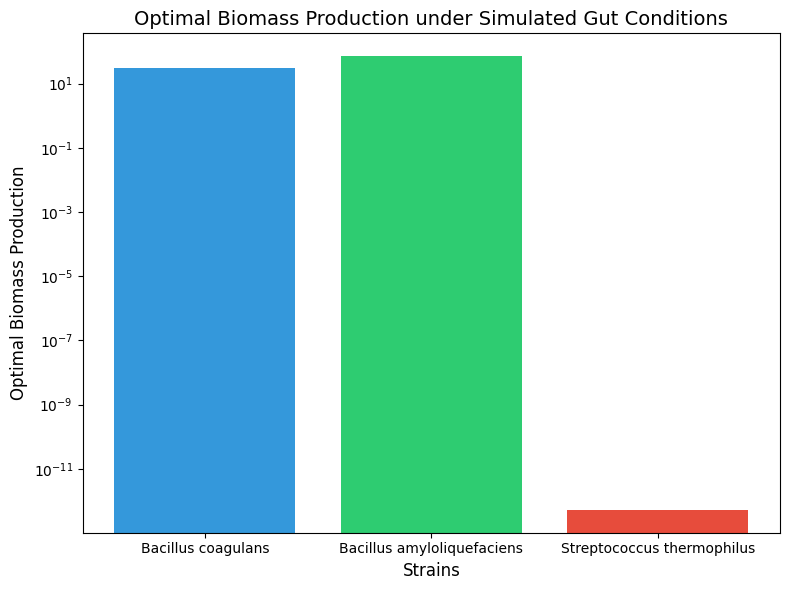

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
strains = ['Bacillus coagulans', 'Bacillus amyloliquefaciens', 'Streptococcus thermophilus']
biomass_values = [31.4875, 72.04164270058463, 5.21e-13]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(strains, biomass_values, color=['#3498db', '#2ecc71', '#e74c3c'])

# Add labels and title
plt.title('Optimal Biomass Production under Simulated Gut Conditions', fontsize=14)
plt.xlabel('Strains', fontsize=12)
plt.ylabel('Optimal Biomass Production', fontsize=12)
plt.yscale('log')  # Log scale to handle large difference in values

# Show the plot
plt.tight_layout()
plt.show()
